In [3]:
from IPython.display import Image

from matplotlib import pyplot as plt
import numpy as np
from numpy.random import normal, binomial, choice
import pandas as pd
from scipy import stats
import seaborn as sns


px = 1 / plt.rcParams["figure.dpi"]  # pixel in inches
plt.rcParams["figure.figsize"] = (600 * px, 400 * px)
%matplotlib widget

## Chapter 5: Monte Carlo Methods

- **Monte Carlo (MC) methods** are learning methods for estimating value functions and discovering optimal policies based on averaging sample returns, useful for cases where we do not have access to or do not want to compute the complete dynamics of the environment.
  - To ensure that well-defined returns are available, here we defined MC methods only for episodic tasks.
  - Only on the completion of an episode are value estimates and/or policies updated.
  - The term "Monte Carlo" is often used broadly for any estimation method involving sampling averaging with a random component: here we use it specifically for estimation methods based on learning from averaging _complete_ returns (as opposed to learning from _partial_ returns, as in **TD learning**.)
- MC methods sample and average returns for each state-action pair, similar to the way bandit methods sample and average individual rewards for each action.
- We adapt the idea of general policy iteration (GPI) developed in Chapter 4 for dynamic programming (DP).
  - In DP we _computed_ value functions from complete knowledge of the MDP; in MC we _learn_ value functions from sample interactions (episodes with returns) with the MDP. 

## 5.1 Monte Carlo Prediction

- MC methods learn the state-value function for a given policy via averaging the returns observed after visits to each state, respectively. By the law of large numbers, as more returns are observed, this average should converge to the E.V.
- Two $v_\pi(s)$ MC estimation methods:
  - **First-visit MC**: estimates $v_\pi(s)$ as the average of the returns following only first visits to $s$ within an episode.
  - **Every-visit MC**: estimates $v_\pi(s)$ as the average of the returns following each visit to $s$ within an episode.
  - Every-visit MC extends more naturally to function approximation and eligibility traces (discussed in Chapters 9 and 12), but for simplicity we focus on first-visit MC in this chapter.

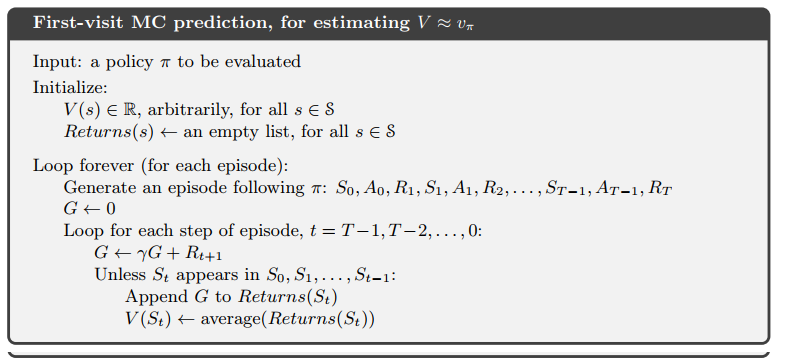

In [5]:
Image(r"images/first_visit_pseudocode.png", width=700)

### 5.1 Exercises

## 5.2 Monte Carlo Estimation of Action-Values

- With a complete model of the environment, _state_ values alone are sufficient to improve a policy via one-step lookahead; without a model, however, we cannot accurately perform this one-step lookahead, so we estimate _action_ values in order to improve a policy: thus one of the primary goals of MC methods is to estimate $q_*$.
  - The MC methods for this are essentially the same as for estimating $v$, except now we consider visits to a state-action pair rather than just to a state.
  - One complication is that many state-action pairs may never be visited, particularly if $\pi$ is a deterministic policy. 
    - One way to combat this general problem of maintaining exploration is to build-in **exploring starts**: specify that each episode starts in a state-action pair, and every possible pair has a nonzero probability of being selected: over a large enough number of episodes, every state-action pair will thus be visited.
    - Another common alternative is to consider policies that are stochastic and with nonzero probabilities of selecting all possible state-action pairs.
      - These are commonly referred to as **on-policy** and **off-policy** methods, and will be discussed in later sections in this chapter.

## 5.3 Monte Carlo Control (Policy Iteration)

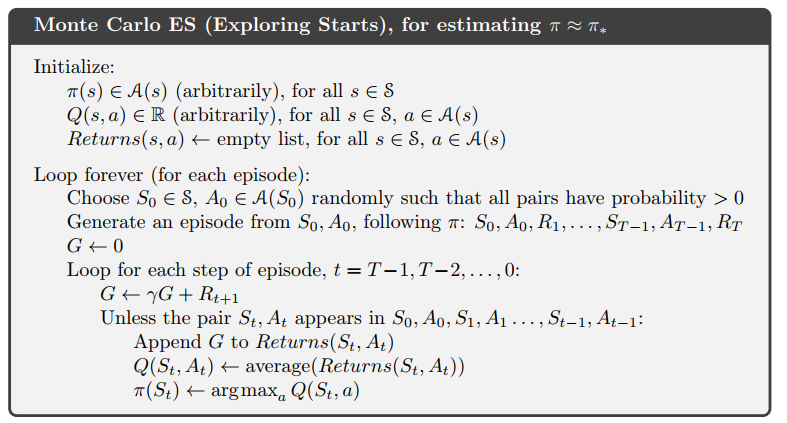

In [7]:
Image(r"images/monte_carlo_es_pseudocode.png", width=700)